In [8]:
from google.colab import files

# Upload the ZIP file manually
uploaded = files.upload()


Saving MangoLeafBD Dataset.zip to MangoLeafBD Dataset.zip


In [9]:
import zipfile
import os

# Define file paths
zip_file_path = "MangoLeafBD Dataset.zip"  # Adjust if the filename is different
extract_folder = "/content/MangoLeafBD_Dataset"

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [10]:
dataset_path = "/content/MangoLeafBD_Dataset/MangoLeafBD Dataset"


<ipython-input-11-53b179134696>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()), palette="viridis")


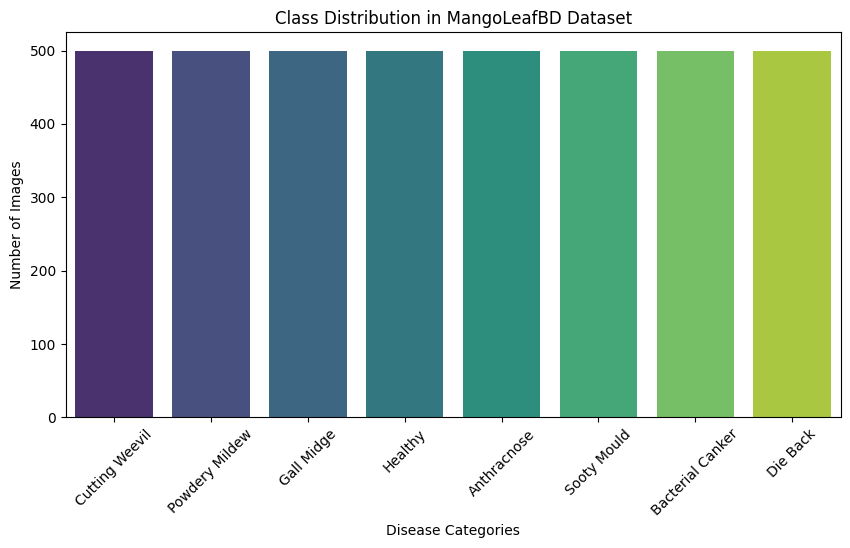

Image Shape Counts: Counter({(240, 240, 3): 3, (240, 320, 3): 3, (320, 240, 3): 2})
Image Formats: {'jpg'}


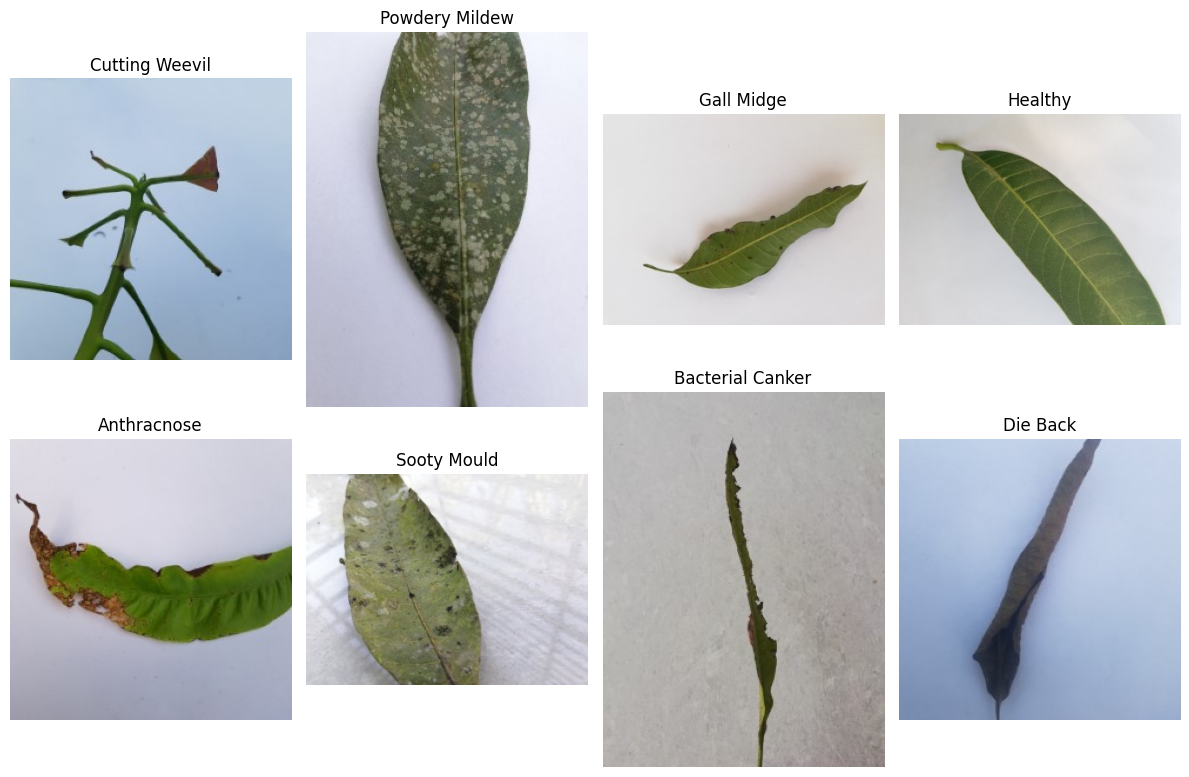

In [11]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Get class names and count images per class
categories = os.listdir(dataset_path)
category_counts = {category: len(os.listdir(os.path.join(dataset_path, category))) for category in categories}

# Plot class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()), palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Disease Categories")
plt.ylabel("Number of Images")
plt.title("Class Distribution in MangoLeafBD Dataset")
plt.show()

# Check image properties (dimensions, formats)
image_shapes = []
formats = []
sample_images = {}

for category in categories:
    category_path = os.path.join(dataset_path, category)
    random_image = random.choice(os.listdir(category_path))
    img_path = os.path.join(category_path, random_image)

    # Read the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Store image shape and format
    image_shapes.append(img.shape)
    formats.append(img_path.split(".")[-1])

    # Store one sample image from each category
    sample_images[category] = img

# Display image shape statistics
shape_counts = Counter(image_shapes)
print("Image Shape Counts:", shape_counts)
print("Image Formats:", set(formats))

# Display sample images
plt.figure(figsize=(12, 8))
for idx, (category, img) in enumerate(sample_images.items()):
    plt.subplot(2, 4, idx + 1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [12]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define dataset path
dataset_path = "/content/MangoLeafBD_Dataset/MangoLeafBD Dataset"

# Initialize lists for images and labels
X = []  # Features (image data)
y = []  # Labels (disease categories)

IMG_SIZE = 64  # Resize images to 64x64 pixels

# Read images and preprocess
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)

        # Load image
        img = cv2.imread(img_path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to 64x64
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img = img.flatten()  # Flatten to 1D array

        # Append to dataset
        X.append(img)
        y.append(category)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Encode labels (convert category names to numbers)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert labels to numbers

print("✅ Data Loaded Successfully!")
print(f"Total Samples: {len(X)}")
print(f"Feature Shape: {X.shape}")  # Should be (num_samples, 64*64)
print(f"Classes: {label_encoder.classes_}")


✅ Data Loaded Successfully!
Total Samples: 4000
Feature Shape: (4000, 4096)
Classes: ['Anthracnose' 'Bacterial Canker' 'Cutting Weevil' 'Die Back' 'Gall Midge'
 'Healthy' 'Powdery Mildew' 'Sooty Mould']


In [13]:
# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print(f"Training Samples: {len(X_train)}, Testing Samples: {len(X_test)}")


Training Samples: 3200, Testing Samples: 800


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate Accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"📌 Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"📌 Random Forest Accuracy: {rf_accuracy:.4f}")


📌 Decision Tree Accuracy: 0.6050
📌 Random Forest Accuracy: 0.8075



Decision Tree Classification Report:
                  precision    recall  f1-score   support

     Anthracnose       0.59      0.48      0.53       104
Bacterial Canker       0.59      0.71      0.65        91
  Cutting Weevil       0.91      0.93      0.92       123
        Die Back       0.70      0.76      0.73        93
      Gall Midge       0.48      0.39      0.43       112
         Healthy       0.50      0.52      0.51       101
  Powdery Mildew       0.47      0.48      0.47        86
     Sooty Mould       0.49      0.50      0.49        90

        accuracy                           0.60       800
       macro avg       0.59      0.60      0.59       800
    weighted avg       0.60      0.60      0.60       800


Random Forest Classification Report:
                  precision    recall  f1-score   support

     Anthracnose       0.73      0.74      0.73       104
Bacterial Canker       0.72      0.78      0.75        91
  Cutting Weevil       0.95      0.98      0.96   

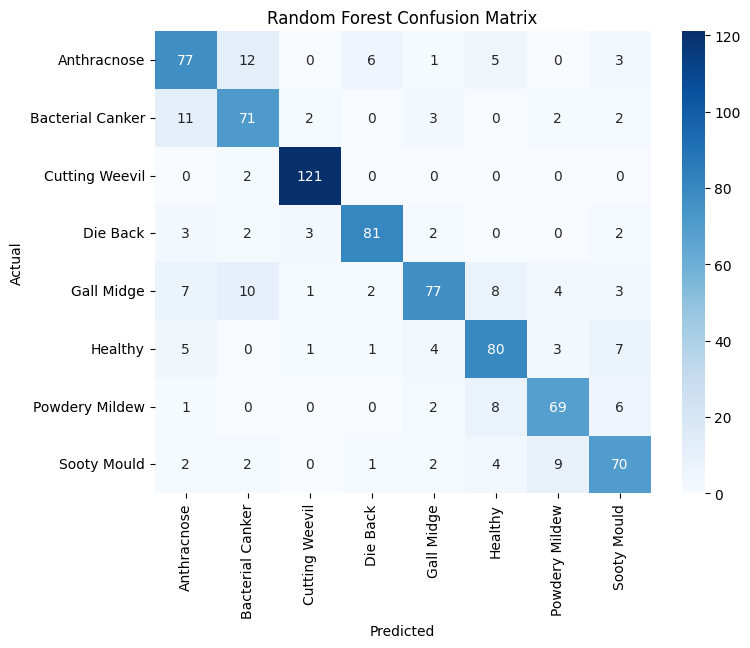

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification reports
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_predictions, target_names=label_encoder.classes_))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions, target_names=label_encoder.classes_))

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [18]:
def predict_image(image_path, model):
    # Load the image from the given path
    img = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Could not load image from {image_path}. Please check the file path.")
        return

    # Resize the image, convert to grayscale, and flatten
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.flatten().reshape(1, -1)  # Reshape for model input

    # Make a prediction using the model
    prediction = model.predict(img)
    predicted_label = label_encoder.inverse_transform(prediction)[0]

    # Show Image with Prediction
    plt.imshow(cv2.imread(image_path))  # Reload to display the image correctly
    plt.title(f"Predicted: {predicted_label}")
    plt.axis("off")
    plt.show()

# Test with a random image from the dataset
test_image_path = "/content/MangoLeafBD_Dataset/MangoLeafBD Dataset/Healthy/0001.jpg"  # Make sure this is a valid image path
predict_image(test_image_path, rf_model)


Error: Could not load image from /content/MangoLeafBD_Dataset/MangoLeafBD Dataset/Healthy/0001.jpg. Please check the file path.


Decision Tree Accuracy: 0.6050

Decision Tree Classification Report:
                  precision    recall  f1-score   support

     Anthracnose       0.59      0.48      0.53       104
Bacterial Canker       0.59      0.71      0.65        91
  Cutting Weevil       0.91      0.93      0.92       123
        Die Back       0.70      0.76      0.73        93
      Gall Midge       0.48      0.39      0.43       112
         Healthy       0.50      0.52      0.51       101
  Powdery Mildew       0.47      0.48      0.47        86
     Sooty Mould       0.49      0.50      0.49        90

        accuracy                           0.60       800
       macro avg       0.59      0.60      0.59       800
    weighted avg       0.60      0.60      0.60       800



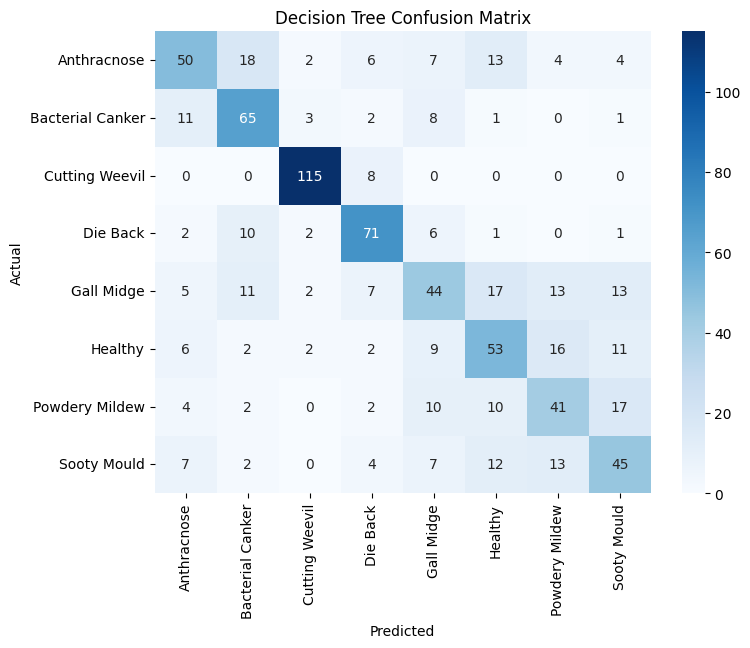

Random Forest Accuracy: 0.8075

Random Forest Classification Report:
                  precision    recall  f1-score   support

     Anthracnose       0.73      0.74      0.73       104
Bacterial Canker       0.72      0.78      0.75        91
  Cutting Weevil       0.95      0.98      0.96       123
        Die Back       0.89      0.87      0.88        93
      Gall Midge       0.85      0.69      0.76       112
         Healthy       0.76      0.79      0.78       101
  Powdery Mildew       0.79      0.80      0.80        86
     Sooty Mould       0.75      0.78      0.77        90

        accuracy                           0.81       800
       macro avg       0.80      0.80      0.80       800
    weighted avg       0.81      0.81      0.81       800



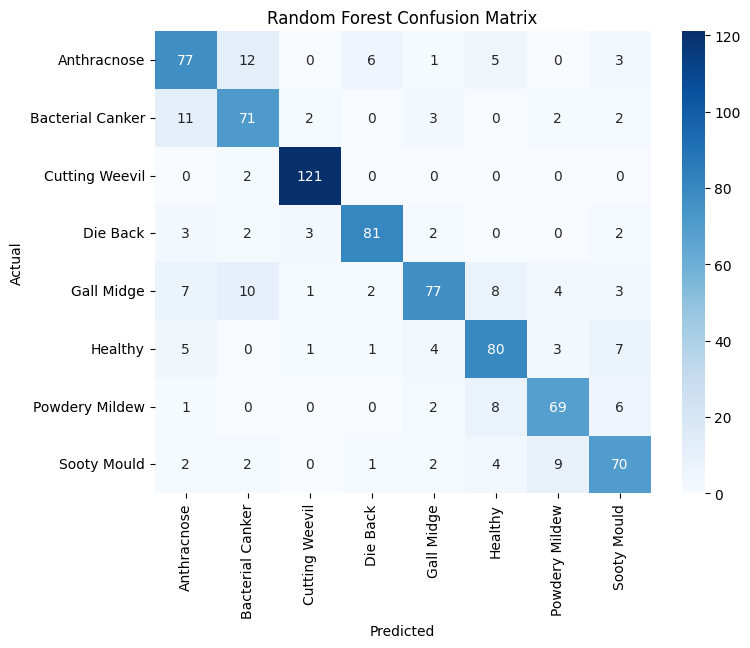

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate Decision Tree Model
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

# Print classification report for Decision Tree
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_predictions, target_names=label_encoder.classes_))

# Plot Confusion Matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Evaluate Random Forest Model
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Print classification report for Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions, target_names=label_encoder.classes_))

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()
